In [2235]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Описание датасета

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

**Пути к директориям и файлам**

In [2236]:
TRAIN_DATASET_PATH = './course_project_train.csv'
TEST_DATASET_PATH = './course_project_test.csv'

**Загрузка данных**

In [2237]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)

df_test = pd.read_csv(TEST_DATASET_PATH)

df_train.shape, df_test.shape

((7500, 17), (2500, 16))

In [2238]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [2239]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [2240]:
df_train.select_dtypes(include=['object'])

,Home Ownership,Years in current job,Purpose,Term
0,Own Home,NaN,debt consolidation,Short Term
1,Own Home,10+ years,debt consolidation,Long Term
2,Home Mortgage,8 years,debt consolidation,Short Term
3,Own Home,6 years,debt consolidation,Short Term
4,Rent,8 years,debt consolidation,Short Term
...,...,...,...,...
7495,Rent,< 1 year,other,Short Term
7496,Home Mortgage,1 year,debt consolidation,Long Term
7497,Rent,6 years,buy a car,Short Term
7498,Home Mortgage,NaN,debt consolidation,Short Term






# Уменьшение объема памяти датасета

In [2241]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col]. astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                       
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                       df[col] = df[col].astype(np.float32)
                else:
                       df[col] = df[col].astype(np.float64)

    
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:1f}%'.format(100 * (start_mem - end_mem) / start_mem))
                       
    return df.head(1)

In [2242]:
reduce_mem_usage(df_train)

Memory usage of dataframe is 0.97 MB
Memory usage after optimization is: 0.58 MB
Decreased by 40.436102%


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.299999,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,100000000.0,47386.0,7914.0,749.0,0


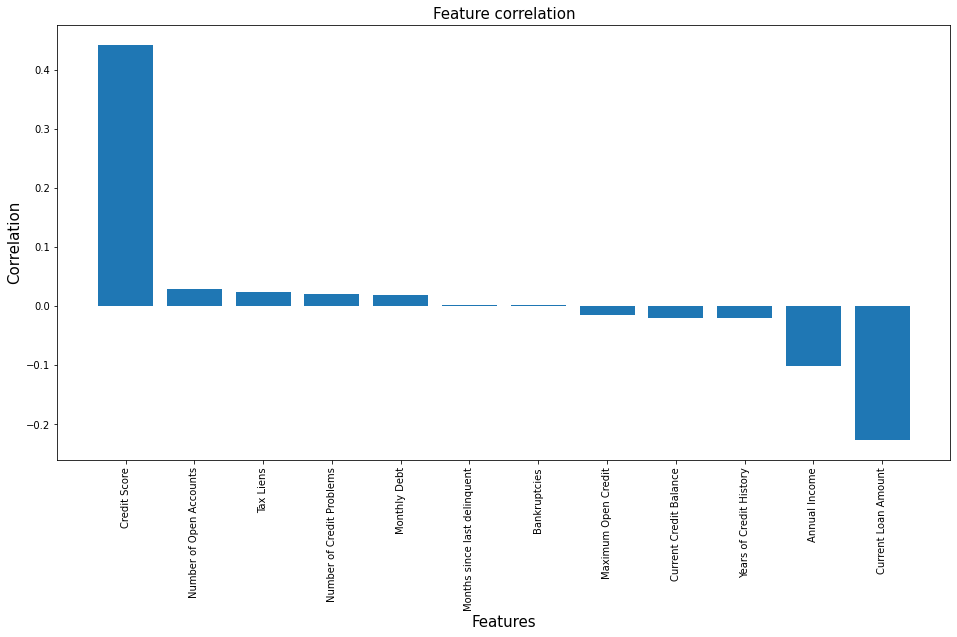

In [2243]:
correlation = df_train.corrwith(df_train['Credit Default']).sort_values(ascending=False)
correlation.drop('Credit Default', inplace=True)

plt.figure(figsize = (16, 8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('Feature correlation', fontsize=15)
plt.show()

In [2244]:
dff = df_train.select_dtypes(include=['float32'])

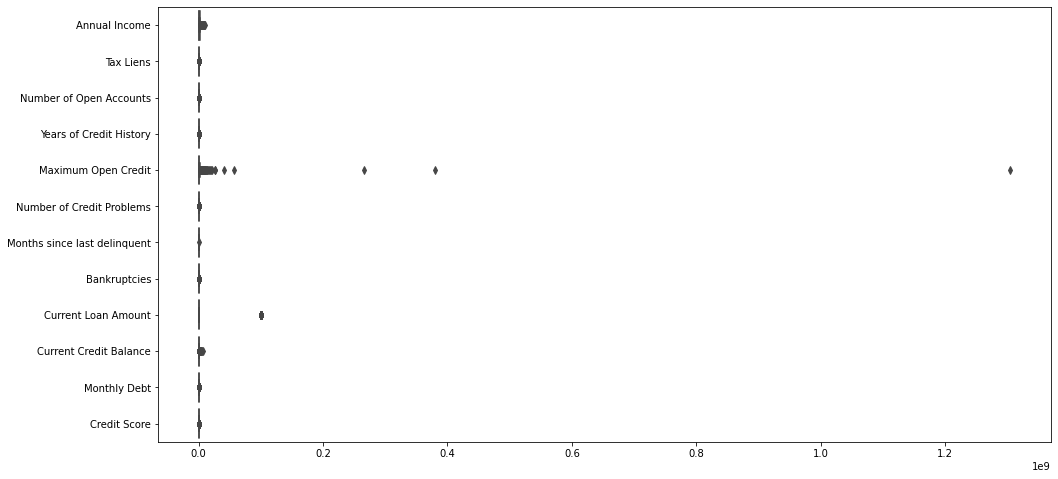

In [2245]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=dff, orient='h')
plt.show()

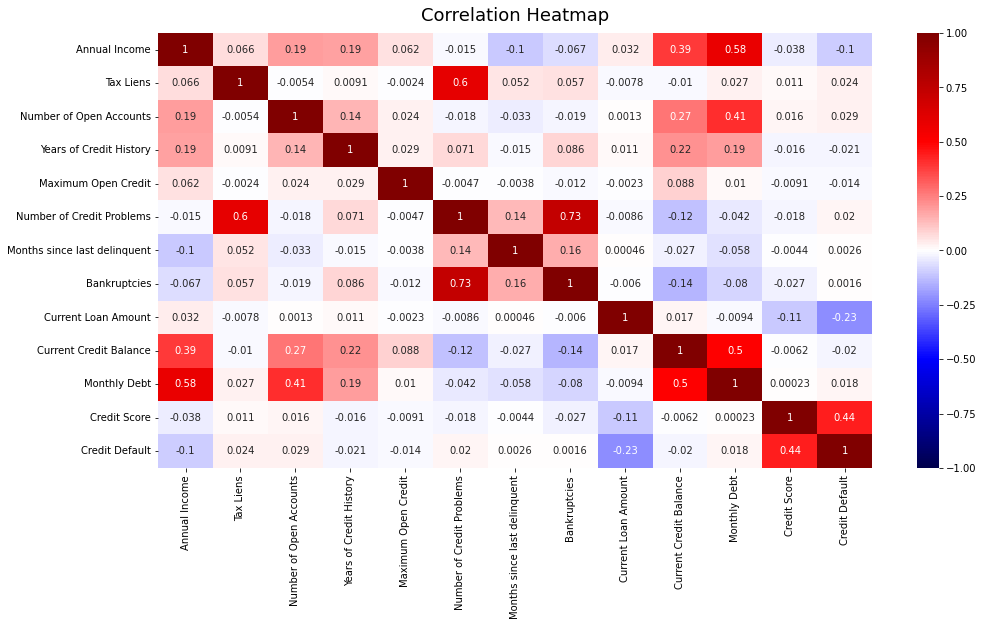

In [2246]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='seismic')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);



# Обработка данных



### *Home Ownership*

In [2247]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [2248]:
df_train.loc[df_train['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'

In [2249]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3649
Rent             3204
Own Home          647
Name: Home Ownership, dtype: int64

In [2250]:
df_train = pd.get_dummies(df_train, columns=['Home Ownership'])

In [2251]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
1399,NaN,9 years,0.0,7.0,16.700001,727430.0,0.0,NaN,0.0,take a trip,Short Term,60566.0,143241.0,9186.0,NaN,0,0,0,1
5403,967100.0,1 year,0.0,7.0,9.400000,172700.0,1.0,NaN,1.0,home improvements,Long Term,100000000.0,48032.0,9026.0,714.0,0,1,0,0


### *Term*

In [2252]:
df_train['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [2253]:
df_train = pd.get_dummies(df_train, columns=['Term'])

In [2254]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term
6967,466355.0,3 years,0.0,10.0,16.299999,423654.0,0.0,NaN,0.0,debt consolidation,183590.0,182951.0,8511.0,739.0,1,0,0,1,0,1
4482,810084.0,2 years,0.0,8.0,23.500000,708862.0,0.0,NaN,0.0,debt consolidation,110352.0,509352.0,11267.0,737.0,0,0,0,1,0,1


### *Years in current job*

In [2255]:
df_train['Years in current job NaN'] = 0
df_train.loc[df_train['Annual Income'].isna(), 'Years in current job NaN'] = 1
years_mode = df_train['Years in current job'].mode()[0]
years_mode

'10+ years'

In [2256]:
df_train['Years in current job'].fillna(years_mode, inplace=True)

In [2257]:
df_train['Years in current job'].value_counts()

10+ years    2703
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [2258]:
years_to_numbers = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
              '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
             '8 years': 8, '9 years': 9, '10+ years': 10}

In [2259]:
df_train['Years in current job'].replace(years_to_numbers, inplace=True)

In [2260]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term,Years in current job NaN
1233,1602403.0,2,0.0,12.0,19.700001,3507042.0,0.0,NaN,0.0,debt consolidation,...,2913707.0,42464.0,676.0,0,1,0,0,1,0,0
2546,2131173.0,2,0.0,21.0,19.200001,1693978.0,0.0,NaN,0.0,debt consolidation,...,700777.0,24864.0,718.0,0,0,0,1,0,1,0


### *Years of Credit History*

In [2261]:
df_train['Years of Credit History']

0       26.299999
1       15.300000
2       35.000000
3       22.500000
4       13.600000
          ...    
7495     8.500000
7496    26.500000
7497    32.099998
7498    26.500000
7499     9.400000
Name: Years of Credit History, Length: 7500, dtype: float32

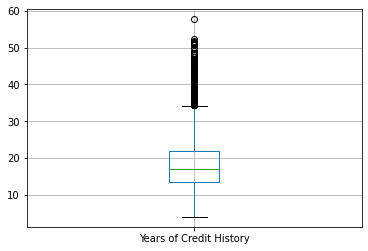

In [2262]:
df_train.boxplot('Years of Credit History')
plt.show()

In [2263]:
q_max = df_train['Years of Credit History'].quantile(0.99)

In [2264]:
df_train['Years of Credit History'].clip(upper=q_max, axis=0, inplace=True)

### *Annual income*

In [2265]:
df_train.corr()['Annual Income']

Annual Income                   1.000000
Years in current job            0.070285
Tax Liens                       0.066245
Number of Open Accounts         0.188524
Years of Credit History         0.190518
Maximum Open Credit             0.062218
Number of Credit Problems      -0.015407
Months since last delinquent   -0.101787
Bankruptcies                   -0.066877
Current Loan Amount             0.032082
Current Credit Balance          0.386481
Monthly Debt                    0.584819
Credit Score                   -0.037832
Credit Default                 -0.101375
Home Ownership_Home Mortgage    0.222966
Home Ownership_Own Home        -0.070768
Home Ownership_Rent            -0.185264
Term_Long Term                  0.096060
Term_Short Term                -0.096060
Years in current job NaN             NaN
Name: Annual Income, dtype: float64

In [2266]:
condition = df_train.groupby(['Number of Open Accounts'])['Annual Income'].agg('median').to_dict()

In [2267]:
condition

{2.0: 897769.0,
 3.0: 759696.0,
 4.0: 864557.0,
 5.0: 966150.0,
 6.0: 1036146.0,
 7.0: 1050016.0,
 8.0: 1149576.0,
 9.0: 1143762.0,
 10.0: 1125180.0,
 11.0: 1235741.0,
 12.0: 1219933.0,
 13.0: 1158924.0,
 14.0: 1260574.0,
 15.0: 1306858.0,
 16.0: 1387152.0,
 17.0: 1403055.0,
 18.0: 1408783.5,
 19.0: 1443601.0,
 20.0: 1407567.5,
 21.0: 1466306.0,
 22.0: 1578178.0,
 23.0: 1489486.0,
 24.0: 1553896.0,
 25.0: 1226792.0,
 26.0: 1361426.0,
 27.0: 2020536.0,
 28.0: 1601719.0,
 29.0: 1300464.5,
 30.0: 1983495.5,
 31.0: 2150477.0,
 32.0: 1346948.0,
 33.0: 1040392.5,
 34.0: 1256622.0,
 35.0: 1257724.0,
 37.0: 2078875.5,
 38.0: 1177411.0,
 41.0: 2714264.0,
 42.0: 2167178.0,
 43.0: 2915759.0}

In [2270]:
df_train.loc[df_train['Annual Income'].isna()]

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term,Years in current job NaN
5,NaN,7,0.0,12.0,14.600000,366784.0,0.0,NaN,0.0,other,...,165680.0,18692.0,NaN,1,0,0,1,1,0,1
8,NaN,5,0.0,17.0,15.700000,0.0,1.0,NaN,1.0,home improvements,...,19.0,17.0,NaN,0,1,0,0,0,1,1
9,NaN,1,0.0,10.0,24.600000,511302.0,0.0,6.0,0.0,debt consolidation,...,205333.0,17613.0,NaN,1,1,0,0,1,0,1
10,NaN,0,0.0,7.0,11.500000,256322.0,0.0,NaN,0.0,debt consolidation,...,187492.0,14592.0,NaN,0,1,0,0,0,1,1
16,NaN,7,0.0,6.0,17.799999,899492.0,0.0,NaN,0.0,debt consolidation,...,538346.0,18844.0,NaN,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,NaN,10,0.0,14.0,30.500000,645062.0,0.0,45.0,0.0,debt consolidation,...,518662.0,23506.0,NaN,0,1,0,0,0,1,1
7492,NaN,10,0.0,10.0,13.300000,423984.0,0.0,NaN,0.0,debt consolidation,...,161481.0,20966.0,NaN,0,1,0,0,0,1,1
7494,NaN,0,0.0,7.0,8.200000,301554.0,0.0,NaN,0.0,debt consolidation,...,210938.0,5070.0,NaN,0,0,1,0,0,1,1
7498,NaN,10,0.0,21.0,26.500000,1141250.0,0.0,NaN,0.0,debt consolidation,...,476064.0,37118.0,NaN,0,1,0,0,0,1,1


In [2271]:
df_train['Annual Income NaN'] = 0
df_train.loc[df_train['Annual Income'].isna(), 'Annual Income NaN'] = 1
df_train.loc[df_train['Annual Income'].isna(), 'Annual Income'] = df_train['Number of Open Accounts'].map(condition) 

In [2272]:
df_train.loc[df_train['Annual Income'].isna()]

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term,Years in current job NaN,Annual Income NaN


In [2275]:
df_train['Annual Income'].fillna(df_train['Annual Income'].median(), inplace=True)

In [2276]:
df_train['Annual Income'].value_counts()

1143762.0    154
1149576.0    150
1125180.0    147
1235741.0    127
1050016.0    123
            ... 
712082.0       1
695476.0       1
678889.0       1
1168158.0      1
402192.0       1
Name: Annual Income, Length: 5492, dtype: int64

In [2277]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term,Years in current job NaN,Annual Income NaN
5673,949810.0,10,0.0,15.0,40.401001,1180388.0,0.0,71.0,0.0,debt consolidation,...,15514.0,727.0,0,1,0,0,1,0,0,0
1865,1143762.0,4,0.0,9.0,17.100000,260084.0,0.0,37.0,0.0,debt consolidation,...,5749.0,NaN,1,1,0,0,0,1,1,1


### *Maximum Open Credit*

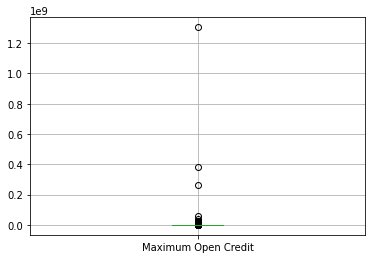

In [2278]:
df_train.boxplot('Maximum Open Credit')
plt.show()

In [2279]:
df_train.loc[(df_train['Maximum Open Credit'] > 0.7 * 10**7), 'Credit Default'].value_counts()

0    30
Name: Credit Default, dtype: int64

In [2280]:
q_min = df_train['Maximum Open Credit'].quantile(0.01)

In [2281]:
 q_max = df_train['Maximum Open Credit'].quantile(0.99)

In [2282]:
df_train['Maximum Open Credit'].clip(upper=q_max, lower=q_min, axis=0, inplace=True)

In [2283]:
# df_train.loc[(df_train['Maximum Open Credit'] > 0.7 * 10**7), 'Maximum Open Credit'] = df_train['Maximum Open Credit'].median()

### *Months since last delinquent*

In [2284]:
df_train['Months since last delinquent'].value_counts()

14.0     76
29.0     71
33.0     68
8.0      68
12.0     65
         ..
86.0      1
118.0     1
84.0      1
91.0      1
92.0      1
Name: Months since last delinquent, Length: 89, dtype: int64

In [2285]:
df_train['Months since last delinquent'].describe()

count    3419.000000
mean       34.692600
std        21.688807
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64

In [2286]:
df_train['Months since last delinquent NaN'] = 0
df_train.loc[df_train['Months since last delinquent'].isna(), 'Months since last delinquent NaN'] = 1
df_train['Months since last delinquent'].fillna(df_train['Months since last delinquent'].median(), inplace=True)

In [2287]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Annual Income                     7500 non-null   float32
 1   Years in current job              7500 non-null   int64  
 2   Tax Liens                         7500 non-null   float32
 3   Number of Open Accounts           7500 non-null   float32
 4   Years of Credit History           7500 non-null   float32
 5   Maximum Open Credit               7500 non-null   float32
 6   Number of Credit Problems         7500 non-null   float32
 7   Months since last delinquent      7500 non-null   float32
 8   Bankruptcies                      7486 non-null   float32
 9   Purpose                           7500 non-null   object 
 10  Current Loan Amount               7500 non-null   float32
 11  Current Credit Balance            7500 non-null   float32
 12  Monthl

### *Bankruptcies*

In [2288]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [2289]:
df_train.corr()['Bankruptcies']

Annual Income                      -0.060807
Years in current job                0.074352
Tax Liens                           0.057360
Number of Open Accounts            -0.019130
Years of Credit History             0.085812
Maximum Open Credit                -0.144804
Number of Credit Problems           0.730751
Months since last delinquent        0.109507
Bankruptcies                        1.000000
Current Loan Amount                -0.005987
Current Credit Balance             -0.142849
Monthly Debt                       -0.079579
Credit Score                       -0.027488
Credit Default                      0.001648
Home Ownership_Home Mortgage       -0.006354
Home Ownership_Own Home            -0.006101
Home Ownership_Rent                 0.009879
Term_Long Term                     -0.031367
Term_Short Term                     0.031367
Years in current job NaN           -0.004905
Annual Income NaN                  -0.004905
Months since last delinquent NaN    0.004561
Name: Bank

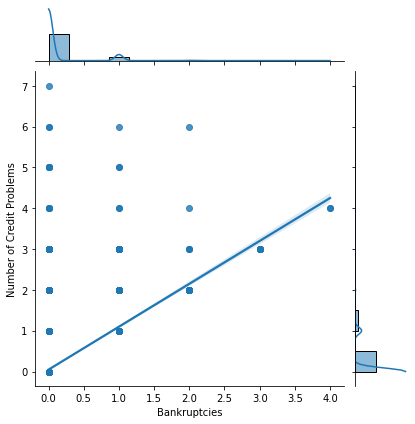

In [2290]:
grid = sns.jointplot(x=df_train.loc[df_train['Bankruptcies'] >= 0, 'Bankruptcies'], y=df_train['Number of Credit Problems'], kind='reg')

plt.show()

In [2291]:
df_train['Bankruptcies NaN'] = 0
df_train.loc[df_train['Bankruptcies'].isna(), 'Bankruptcies NaN'] = 1
df_train['Bankruptcies'].fillna(df_train['Number of Credit Problems'], inplace=True)

In [2292]:
df_train.loc[df_train['Number of Credit Problems'] == df_train['Bankruptcies'], ['Number of Credit Problems', 'Bankruptcies']]

,Number of Credit Problems,Bankruptcies
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
5,0.0,0.0
...,...,...
7495,0.0,0.0
7496,0.0,0.0
7497,0.0,0.0
7498,0.0,0.0


### *Purpose*

In [2293]:
df_train['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [2294]:
df_train.loc[(df_train['Purpose'] != 'debt consolidation') & (df_train['Purpose'] != 'home improvements'), 'Purpose'] = 'other'

In [2295]:
df_train['Purpose'].value_counts()

debt consolidation    5944
other                 1144
home improvements      412
Name: Purpose, dtype: int64

In [2296]:
df_train = pd.get_dummies(df_train, columns=['Purpose'])

In [2297]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Home Ownership_Rent,Term_Long Term,Term_Short Term,Years in current job NaN,Annual Income NaN,Months since last delinquent NaN,Bankruptcies NaN,Purpose_debt consolidation,Purpose_home improvements,Purpose_other
6529,3888920.0,5,0.0,15.0,35.799999,705254.0,0.0,32.0,0.0,461560.0,...,0,0,1,0,0,1,0,0,0,1
453,616892.0,10,0.0,6.0,19.900000,415250.0,0.0,47.0,0.0,273042.0,...,1,0,1,0,0,0,0,1,0,0


### *Current Loan Amount*

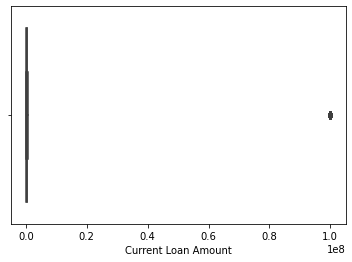

In [2298]:
sns.boxplot(data=df_train, x='Current Loan Amount')
plt.show()

In [2299]:
df_train.corr()['Current Loan Amount']

Annual Income                       0.049354
Years in current job               -0.002339
Tax Liens                          -0.007835
Number of Open Accounts             0.001346
Years of Credit History             0.011493
Maximum Open Credit                 0.035824
Number of Credit Problems          -0.008596
Months since last delinquent       -0.001656
Bankruptcies                       -0.006169
Current Loan Amount                 1.000000
Current Credit Balance              0.016672
Monthly Debt                       -0.009382
Credit Score                       -0.108552
Credit Default                     -0.226522
Home Ownership_Home Mortgage        0.014146
Home Ownership_Own Home             0.004196
Home Ownership_Rent                -0.016674
Term_Long Term                     -0.075222
Term_Short Term                     0.075222
Years in current job NaN           -0.185545
Annual Income NaN                  -0.185545
Months since last delinquent NaN    0.021441
Bankruptci

In [2300]:
df_train['Current Loan Amount'].quantile(0.883)

788262.332

In [2301]:
condition = df_train['Current Loan Amount'] >= 10**7

In [2302]:
df_train['Current Loan Amount Outlier'] = 0
df_train.loc[condition, 'Current Loan Amount Outlier'] = 1
df_train.loc[condition, 'Current Loan Amount'] = df_train['Current Loan Amount'].median()

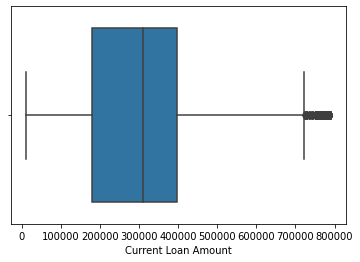

In [2303]:
sns.boxplot(data=df_train, x='Current Loan Amount')
plt.show()

### Credit Score (пропуски и выбросы)

In [2304]:
df_train['Credit Score'].describe()

count    5943.000000
mean     1151.087524
std      1604.451416
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

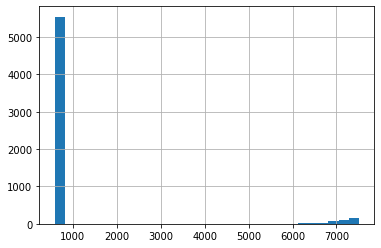

In [2305]:
df_train['Credit Score'].hist(bins=30)

plt.show()

In [2306]:
df_train['Credit Score'].quantile(0.9)

749.0

In [2307]:
df_train.loc[(df_train['Credit Score'] > 751), 'Credit Default'].value_counts()

1    400
Name: Credit Default, dtype: int64

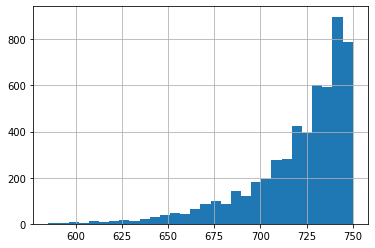

In [2308]:
df_train.loc[df_train['Credit Score'] < 751.0, 'Credit Score'].hist(bins=30)
plt.show()

In [2309]:
df_train['Credit Score'].min()

585.0

In [2310]:
# df_train.drop(df_train.loc[df_train['Credit Score'] > 751, 'Credit Score'].index, inplace=True)

In [2311]:
df_train.loc[df_train['Credit Score'] > 751, 'Credit Score'] = df_train['Credit Score'].median() 

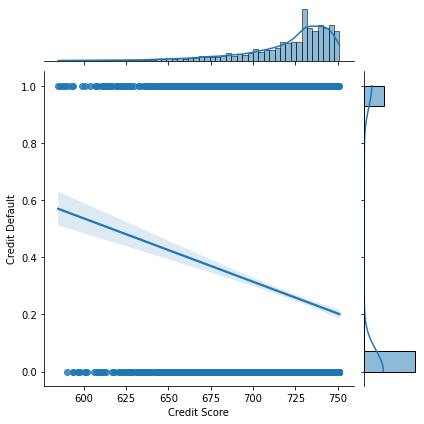

In [2312]:
grid = sns.jointplot(x=df_train['Credit Score'], y=df_train['Credit Default'], kind='reg')

plt.show()

In [2313]:
df_train.corr()['Credit Score']

Annual Income                       0.027031
Years in current job               -0.026413
Tax Liens                          -0.016362
Number of Open Accounts            -0.032338
Years of Credit History             0.058079
Maximum Open Credit                 0.116072
Number of Credit Problems          -0.059250
Months since last delinquent       -0.018784
Bankruptcies                       -0.046573
Current Loan Amount                -0.184549
Current Credit Balance             -0.003936
Monthly Debt                       -0.065462
Credit Score                        1.000000
Credit Default                     -0.134751
Home Ownership_Home Mortgage        0.043761
Home Ownership_Own Home            -0.035012
Home Ownership_Rent                -0.024362
Term_Long Term                     -0.442418
Term_Short Term                     0.442418
Years in current job NaN                 NaN
Annual Income NaN                        NaN
Months since last delinquent NaN    0.100852
Bankruptci

In [2314]:
df_train.loc[df_train['Credit Score'].isna()].groupby(['Credit Default', 'Term_Long Term']).first()

Annual Income  Years in current job  Tax Liens  \
Credit Default Term_Long Term                                                   
0              0                   1403055.0                     5        0.0   
               1                   1125180.0                    10        0.0   
1              0                   1403055.0                    10        0.0   
               1                   1219933.0                     7        0.0   

                               Number of Open Accounts  \
Credit Default Term_Long Term                            
0              0                                  17.0   
               1                                  10.0   
1              0                                  17.0   
               1                                  12.0   

                               Years of Credit History  Maximum Open Credit  \
Credit Default Term_Long Term                                                 
0              0                                  15.7         1.726978e+04   
               1                                  21.4         1.104554e+06   
1              0                                  14.8         7.000400e+05   
               1                                  14.6         3.667840e+05   

                               Number of Credit Problems  \
Credit Default Term_Long Term                              
0              0                                     1.0   
               1                                     1.0   
1              0                                     0.0   
               1                                     0.0   

                               Months since last delinquent  Bankruptcies  \
Credit Default Term_Long Term                                               
0              0                                       32.0           1.0   
               1                                       32.0           1.0   
1              0                                       17.0           0.0   
               1                                       32.0           0.0   

                               Current Loan Amount  ...  Home Ownership_Rent  \
Credit Default Term_Long Term                       ...                        
0              0                          129734.0  ...                    0   
               1                          774092.0  ...                    0   
1              0                          174878.0  ...                    0   
               1                          337304.0  ...                    1   

                               Term_Short Term  Years in current job NaN  \
Credit Default Term_Long Term                                              
0              0                             1                         1   
               1                             0                         1   
1              0                             1                         1   
               1                             0                         1   

                               Annual Income NaN  \
Credit Default Term_Long Term                      
0              0                               1   
               1                               1   
1              0                               1   
               1                               1   

                               Months since last delinquent NaN  \
Credit Default Term_Long Term                                     
0              0                                              1   
               1                                              1   
1              0                                              0   
               1                                              1   

                               Bankruptcies NaN  Purpose_debt consolidation  \
Credit Default Term_Long Term                                                 
0              0                              0                           0   
     

In [2315]:
df_train['Credit Score NaN'] = 0
df_train.loc[df_train['Credit Score'].isna(), 'Credit Score NaN'] = 1
df_train['Credit Score'].fillna(df_train['Credit Score'].median(), inplace=True)

In [2316]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

# 3. Модели
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 4. Метрики качества
from sklearn.metrics import f1_score as f1

In [2317]:
X = df_train.drop(columns='Credit Default')

In [2318]:
y = df_train['Credit Default']

In [2319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=100)

### Gradient Boosting Classifier

In [2320]:
clf = GradientBoostingClassifier(n_estimators=150,
                                 max_depth=4,
                                 min_samples_split=40,
                                 min_samples_leaf=1,
                                 random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1(y_test, y_pred)

0.4272030651340996

In [2321]:
y_pred = clf.predict(X_train)
f1(y_train, y_pred)

0.6084905660377358

### Decision Tree Classifier

In [2322]:
max_depth_values = np.arange(2, 20)

accuracy_on_test = []
accuracy_on_train = []

for i, value in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=value,
#                                  min_samples_split=10,
#                                  min_samples_leaf=15,
#                                  max_leaf_nodes=100,
                                 random_state=42)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
        
    acc_test = f1(y_test, y_pred)
    acc_train = f1(y_train, y_pred_train)
    
    if i % 4 == 2:
        print('K = {}'.format(value))
        print('\tf1_test = {}'.format(acc_test))
        print('\tf1_train = {}\n'.format(acc_train))
    
    accuracy_on_test.append(acc_test)
    accuracy_on_train.append(acc_train)

K = 4
	f1_test = 0.30944254835039814
	f1_train = 0.3276967930029155

K = 8
	f1_test = 0.43362831858407075
	f1_train = 0.5844789356984479

K = 12
	f1_test = 0.437201907790143
	f1_train = 0.7855973813420623

K = 16
	f1_test = 0.4298245614035088
	f1_train = 0.919042189281642



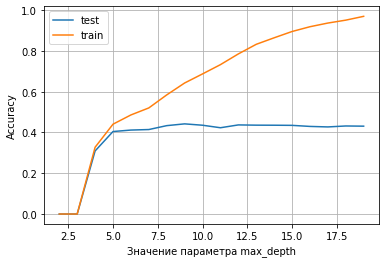

In [2323]:
plt.rcParams['figure.figsize'] = 6, 4

plt.plot(max_depth_values, accuracy_on_test, label="test")
plt.plot(max_depth_values, accuracy_on_train, label="train")

plt.xlabel('Значение параметра max_depth')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

In [2324]:
clf = DecisionTreeClassifier(max_depth=8,
                             min_samples_split=5,
                             min_samples_leaf=15,
                             max_leaf_nodes=100,
                             random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1(y_test, y_pred)

0.4618086040386304

In [2325]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       clf.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [2326]:
feature_importances

,feature_name,importance
26,Credit Score NaN,0.233237
12,Credit Score,0.204903
25,Current Loan Amount Outlier,0.164183
0,Annual Income,0.073187
16,Term_Long Term,0.072930
9,Current Loan Amount,0.057750
5,Maximum Open Credit,0.044769
11,Monthly Debt,0.037290
3,Number of Open Accounts,0.022787
4,Years of Credit History,0.020962


In [ ]:
y_pred = clf.predict(df_test)

In [ ]:
df_test